## Homework - Carlotta Hicks

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
import math

%matplotlib inline

In [2]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)
df.price = df.price.fillna(0)

In [3]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [4]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [5]:
# Apply the log tranform to price

df['price'] = np.log1p(df['price'])

In [6]:
# train/validation/test split with 60%/20%/20% distribution.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

Now, use `DictVectorizer` to turn train and validation into matrices:

In [7]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [8]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [9]:
del df_train['price']
del df_val['price']
del df_test['price']

In [10]:
#  use DictVectorizer to turn train and validation into matrices
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [11]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

In [12]:
print(export_text(model, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



#### The room_type feature is used to split the data.

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [13]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [14]:
y_pred = rf.predict(X_val)

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

In [15]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [16]:
rmse(y_val, y_pred)

0.4615632303514057

In [17]:
mse = mean_squared_error(y_val, y_pred)
rmse = math.sqrt(mse)
rmse

0.4615632303514057

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [18]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = math.sqrt(mse)
    scores.append((n, rmse))

In [19]:
columns = ['n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [20]:
df_scores

,n_estimators,rmse
0,10,0.461563
1,20,0.448184
2,30,0.445535
3,40,0.443637
4,50,0.442325
5,60,0.441639
6,70,0.441240
7,80,0.441125
8,90,0.440551
9,100,0.439973


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

#### RMSE stops improving at 10 n_estimators

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [21]:
scores = []

for s in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=s, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = math.sqrt(mse)
        scores.append((s, n, rmse))

In [22]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

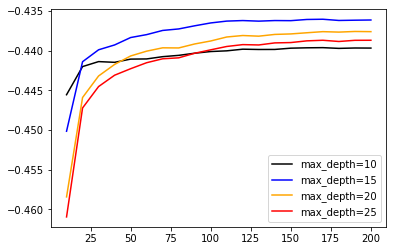

In [23]:
colors = ['black', 'blue', 'orange', 'red']
values = [10, 15, 20, 25]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.max_depth == s]
    
    plt.plot(df_subset.n_estimators, -df_subset.rmse,
             color=col,
             label='max_depth=%d' % s)

plt.legend()

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

#### The best max_depth is 15

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [24]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

In [25]:
# Create new dataframe with one hot encodings for features neighbourhood_group and room_type

new_df = df.copy()
hood = pd.DataFrame()
room = pd.DataFrame()
for c in df['neighbourhood_group'].unique():
    hood[c] = (df['neighbourhood_group'] == c).astype(int)    
for r in df['room_type'].unique():
    room[r] = (df['room_type'] == r).astype(int)
new_df = pd.concat([new_df, hood, room], axis = 1)
del new_df['neighbourhood_group']
del new_df['room_type']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  float64
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
 8   Brooklyn                        48895 non-null  int32  
 9   Manhattan                       48895 non-null  int32  
 10  Queens                          48895 non-null  int32  
 11  Staten Island                   48895 non-null  int32  
 12  Bronx                           

In [26]:
new_df['price'] = np.log1p(new_df['price'])

In [27]:
new_df_full_train, new_df_test = train_test_split(new_df, test_size=0.2, random_state=1)
new_df_train, new_df_val = train_test_split(new_df_full_train, test_size=0.25, random_state=1)

In [28]:
new_df_train = new_df_train.reset_index(drop=True)
new_df_val = new_df_val.reset_index(drop=True)
new_df_test = new_df_test.reset_index(drop=True)

In [29]:
new_y_train = new_df_train.price.values
new_y_val = new_df_val.price.values
new_y_test = new_df_test.price.values

In [30]:
del new_df_train['price']
del new_df_val['price']
del new_df_test['price']

In [31]:
new_dv = DictVectorizer(sparse=False)

new_train_dict = new_df_train.to_dict(orient='records')
new_X_train = new_dv.fit_transform(new_train_dict)


In [32]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(new_X_train, new_y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [33]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index = new_dv.get_feature_names(),
                                  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Entire home/apt,0.396991
longitude,0.149168
latitude,0.144493
availability_365,0.075014
reviews_per_month,0.060025
minimum_nights,0.049452
number_of_reviews,0.040247
Manhattan,0.038341
calculated_host_listings_count,0.031683
Shared room,0.006458


#### The most important feature is `room_type=Entire home/apt`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [34]:
!pip install xgboost

In [35]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [37]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [39]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [40]:
y_pred = model.predict(dval)
rmse = sqrt(mean_squared_error(y_val, y_pred))
print('RMSE using eta = 0.3 is %s' % (rmse))

RMSE using eta = 0.3 is 0.43621034591295677


Now change `eta` first to `0.1` and then to `0.01`

In [41]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [42]:
y_pred = model.predict(dval)
rmse = sqrt(mean_squared_error(y_val, y_pred))
print('RMSE using eta = 0.1 is %s' % (rmse))

RMSE using eta = 0.1 is 0.43249655247991464


In [43]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [44]:
y_pred = model.predict(dval)
rmse = sqrt(mean_squared_error(y_val, y_pred))
print('RMSE using eta = 0.01 is %s' % (rmse))

RMSE using eta = 0.01 is 1.630452438951798


Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

#### Eta 0.1 leads to the best RMSE score on the validation dataset.

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

